In [115]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

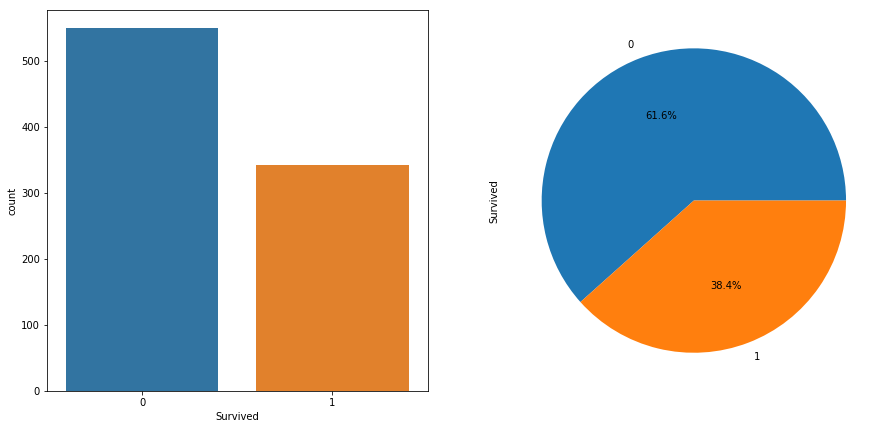

In [38]:
fig , ax = plt.subplots(1,2,figsize=(15,7))
sns.countplot(train['Survived'],ax=ax[0])
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])

Text(0.5,1,'Subplot Two')

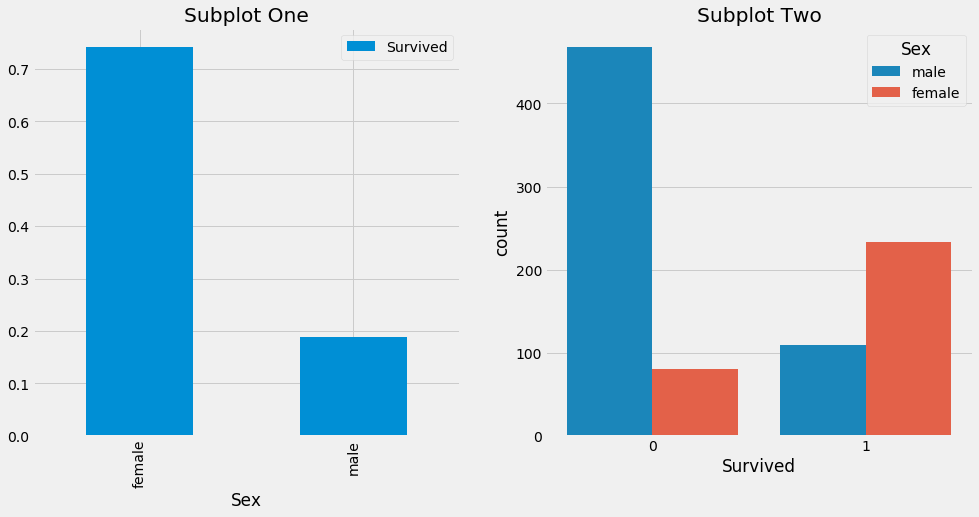

In [69]:
fig , ax = plt.subplots(1,2,figsize=(15,7))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
sns.countplot('Survived',data = train , hue='Sex',ax=ax[1])
ax[0].set_title('Subplot One')
ax[1].set_title('Subplot Two')

/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


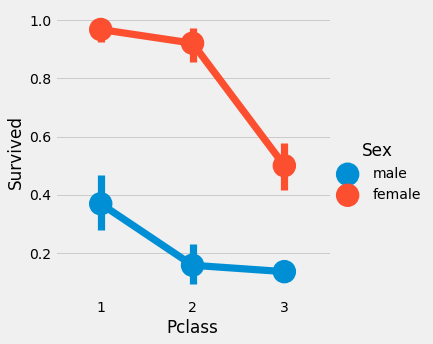

In [68]:
## Factorplot 
plt.style.use('fivethirtyeight')
sns.factorplot('Pclass','Survived',hue='Sex',data = train)

In [106]:
## Creating Age Buckets 

train['Age_Bucket']=0
train.loc[train['Age']<16,'Age_Bucket']=0
train.loc[(train['Age']>=16) & (train['Age']<=32),'Age_Bucket']=1
train.loc[(train['Age']>32) & (train['Age']<=48),'Age_Bucket']=2
train.loc[(train['Age']>48) & (train['Age']<=64),'Age_Bucket']=3
train.loc[train['Age']>64,'Age_Bucket']=4

In [108]:
train['Age_Bucket'].value_counts()

1    363
0    260
2    188
3     69
4     11
Name: Age_Bucket, dtype: int64

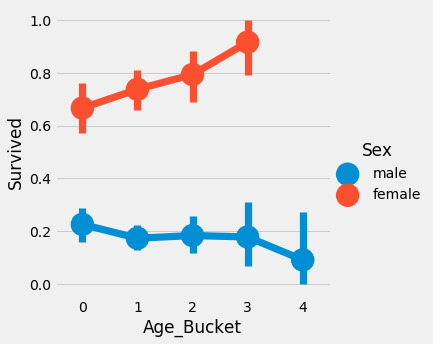

In [116]:
sns.factorplot('Age_Bucket','Survived',data = train,hue='Sex')

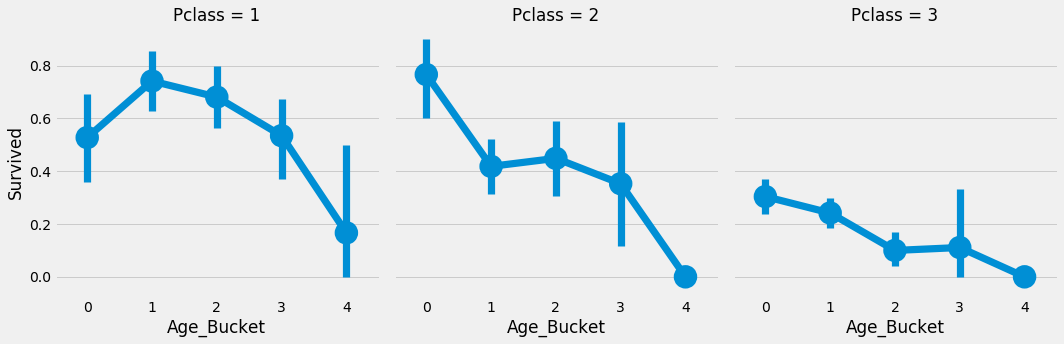

In [121]:
sns.factorplot('Age_Bucket','Survived',data = train, col='Pclass')

In [125]:
train['Fare_Range']= pd.qcut(train['Fare'],4)


In [128]:
train['Fare_Range'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare_Range, dtype: int64

In [129]:
train['Fare_Bucket']=0
train.loc[train['Fare']<7,'Fare_Bucket']=0
train.loc[(train['Fare']>=7) & (train['Fare']<=14),'Fare_Bucket']=1
train.loc[(train['Fare']>14) & (train['Fare']<=32),'Fare_Bucket']=2
train.loc[(train['Fare']>32) & (train['Fare']<=512),'Fare_Bucket']=3
train.loc[train['Fare']>512,'Fare_Bucket']=4

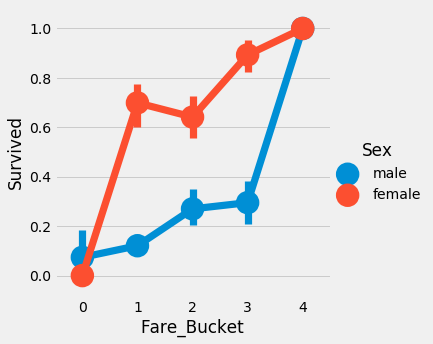

In [132]:
sns.factorplot('Fare_Bucket','Survived',data = train, hue='Sex')

In [144]:
## Prediction Using KNN for one value of K 
X = train.drop(['Survived','Name'],axis=1)
y=train['Survived']


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)